**Project 1: COCOTEXT**

Alireza Amiri

# **Part 2 - Object Detection**

In this part of the project, you will use your skills in object detection to train a network on the COCO–Text dataset. All
the design parameters including type of the object detection network, backbone (feature extractor), input resolution,
batch size, number of steps for training, etc. are arbitrarily and should be chosen based on your knowledge, so be
careful about choosing each parameter. The minimum requirement of this part is training one object detection network
and testing and visualizing the network on the test images. Don’t forget that the discussion on choosing parameters
and the output result is important!


## **Data preparation**

### **Downloading the dataset and unzipping it**

---


In order to download dataset, we can use the codes given in homework description. but due to the limitations of google drive, we must use another approach.
to do so, we add the link to our google drive and then mount drive into workspace. now we can access the files inside drive and use them.
we used unzip command to extract data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/cocotext.zip -d cocotext

Streaming output truncated to the last 5000 lines.
  inflating: cocotext/train/12830.txt  
  inflating: cocotext/train/10059.txt  
  inflating: cocotext/train/7115.txt  
  inflating: cocotext/train/16930.txt  
  inflating: cocotext/train/2969.jpg  
  inflating: cocotext/train/231.jpg  
  inflating: cocotext/train/7136.jpg  
  inflating: cocotext/train/6651.jpg  
  inflating: cocotext/train/4156.jpg  
  inflating: cocotext/train/12312.txt  
  inflating: cocotext/train/11024.jpg  
  inflating: cocotext/train/2637.jpg  
  inflating: cocotext/train/14047.jpg  
  inflating: cocotext/train/11493.txt  
  inflating: cocotext/train/734.jpg  
  inflating: cocotext/train/15478.jpg  
  inflating: cocotext/train/7306.jpg  
  inflating: cocotext/train/757.jpg  
  inflating: cocotext/train/3267.txt  
  inflating: cocotext/train/7776.jpg  
  inflating: cocotext/train/7949.txt  
  inflating: cocotext/train/7975.jpg  
  inflating: cocotext/train/2405.txt  
  inflating: cocotext/train/13139.jpg  
  infla

In [ ]:
from random import choice
import torch
from IPython.display import Image
import shutil
import os

In order to use YOLO V8 model for detection of texts, we must first install its related packages, most importantly ultralytics

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 kB 8.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 28327, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 28327 (delta 13), reused 16 (delta 4), pack-reused 28282
Receiving objects: 100% (28327/28327), 16.21 MiB | 16.92 MiB/s, done.
Resolving deltas: 100% (20033/20033), done.


After installing all the requirements, we check to ensure that ultralytics is installed correctly.

In [ ]:
%cd ultralytics

/content/ultralytics


### **Organizing the files and folders to match the requirements of the project.**

---



In the following sections, we wish to organize files in such a way that is understandable for YOLO algorithm. This structure requires copying files inside ultralytics directory with two folders in which inside each of them, images and text files are seperated into different folders.
This way, YOLO algorithm can be run on the dataset

In [ ]:
source_path='/content/cocotext'
destination_path='/content/ultralytics/ultralytics/datasets'
if not os.path.exists(destination_path):
  os.makedirs(destination_path)


In [ ]:
import os

destination_path = '/content/ultralytics/ultralytics/datasets'

# Check if directory exists
if os.path.exists(destination_path):
  print(f"Directory exists: {destination_path}")
else:
  print(f"Directory does not exist: {destination_path}")


Directory exists: /content/ultralytics/ultralytics/datasets


The process in the following code is as follows:
1. the currently existing folders are addresses.
2. we create new folders of images and labels inside both test and train folders
3. Next, data is copied to destination folders based on their types. in order to seperate images from text files, the ending format of files are assessed and if they were equall to ".jpeg", they will be transferred to images folder, else, they will be stored in label folder

In [ ]:
import os
import shutil

source_train = "/content/cocotext/train"
source_test = "/content/cocotext/test"
dest_dir = "/content/ultralytics/ultralytics/datasets"

# Create destination folders (images and labels) with subfolders (train and test)
os.makedirs(os.path.join(dest_dir, "images", "train"), exist_ok=True)
os.makedirs(os.path.join(dest_dir, "images", "test"), exist_ok=True)
os.makedirs(os.path.join(dest_dir, "labels", "train"), exist_ok=True)
os.makedirs(os.path.join(dest_dir, "labels", "test"), exist_ok=True)

# Move data from source to destination (train and test folders preserved)
def move_data(source_folder, dest_images, dest_labels):
  for filename in os.listdir(source_folder):
    if filename.endswith(".jpg"):
      image_path = os.path.join(source_folder, filename)
      label_path = os.path.join(source_folder, os.path.splitext(filename)[0] + ".txt")  # Assuming consistent naming
      shutil.move(image_path, os.path.join(dest_images, filename))  # Use move to maintain structure
      shutil.move(label_path, os.path.join(dest_labels, os.path.splitext(filename)[0] + ".txt"))

# Process train data
move_data(source_train, os.path.join(dest_dir, "images", "train"), os.path.join(dest_dir, "labels", "train"))

# Process test data
move_data(source_test, os.path.join(dest_dir, "images", "test"), os.path.join(dest_dir, "labels", "test"))

print("Data moved to destination folders!")


Data moved to destination folders!


### **Deifne architecture of the dataset in .yaml file.**

---



Besides redesigning the architecture of data, we must also give the algorithm a .yaml file to define the configurations of dataset.
In this project, the .yaml file is as follows:


path: /content/ultralytics/ultralytics/datasets

train: images/train

val: images/test

nc: 1


names:
  0: 'text'

In [ ]:
shutil.copy('/content/AI.yaml' ,'/content/ultralytics/ultralytics/datasets')

'/content/ultralytics/ultralytics/datasets/AI.yaml'

In [ ]:
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random
import numpy as np
from google.colab.patches import cv2_imshow

## **Data Visualization**

In order to examine data and labels and have an understanding of the goal of this project, we must first visualise a few samples of data.
This task, requires previewing an image, finding its corresponding label file and using data inside text files to plot rectangles at the correct position.
To do so, we defined a function which executes the above operations. This function inputs the image and label directories and outputs the resulting stacked image

In [ ]:
def visualize_bounding_boxes(image_path, annotation_path):
    # Load the image
    image_BGR = cv2.imread(image_path)

    with open(annotation_path) as f:
        lst = [line.rstrip() for line in f]

    # Going through all bounding boxes
    for i in range(len(lst)):
        # Getting current bounding box coordinates, width, and height
        bb_current = lst[i].split()
        x_center, y_center = int(float(bb_current[1]) * image_BGR.shape[1]), int(float(bb_current[2]) * image_BGR.shape[0])
        box_width, box_height = int(float(bb_current[3]) * image_BGR.shape[1]), int(float(bb_current[4]) * image_BGR.shape[0])

        # Calculate top-left corner coordinates (x_min, y_min)
        x_min = int(x_center - (box_width / 2))
        y_min = int(y_center - (box_height / 2))

        # Draw bounding box on the original image
        cv2.rectangle(image_BGR, (x_min, y_min), (x_min + box_width, y_min + box_height), [172, 10, 127], 2)

        # Prepare text with label and confidence for the current bounding box
        class_current = 'Class: {}'.format(bb_current[0])

        # Put text with label and confidence on the original image
        cv2.putText(image_BGR, class_current, (x_min, y_min - 5), cv2.FONT_HERSHEY_COMPLEX, 0.7, [172, 10, 127], 2)

    # Display the image with bounding boxes
    cv2_imshow(image_BGR)

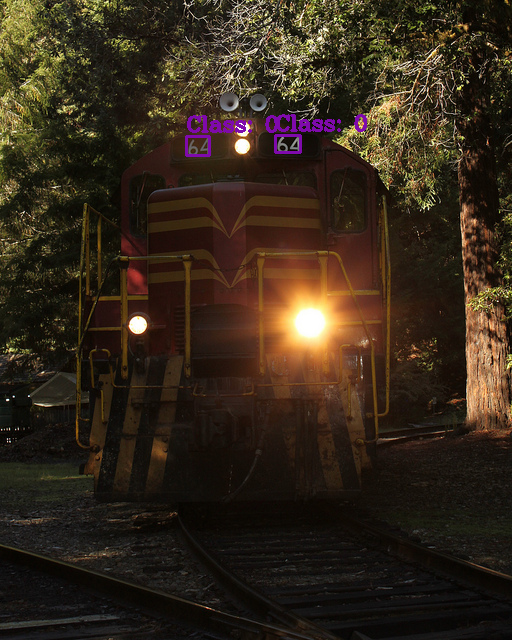

In [ ]:
image_path = '/content/ultralytics/ultralytics/datasets/images/test/100.jpg'
annotation_path = '/content/ultralytics/ultralytics/datasets/labels/test/100.txt'
visualize_bounding_boxes(image_path, annotation_path)

We can see that the class name is also written on the image besides each bounding box, but since there are no other classes than "text" that would be unnecessary

## **Model Initialization and Training**

---



Having Ultralytics package installed, we may use YOLO v8 model.

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 132MB/s]


In this part, hyperparameters of model is defined. number of epoches can be chosen as larger numbers, but due to the computation cost, it is considered to be relatively low in the first run to assess the performance of the model.

In [ ]:
model.train(data='/content/AI.yaml', epochs=10, imgsz=640)

Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/AI.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 755k/755k [00:00<00:00, 21.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/ultralytics/ultralytics/datasets/labels/train... 13712 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13712/13712 [00:36<00:00, 379.36it/s]


train: New cache created: /content/ultralytics/ultralytics/datasets/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/ultralytics/ultralytics/datasets/labels/test... 3429 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3429/3429 [00:09<00:00, 347.49it/s]

val: WARNING ⚠️ /content/ultralytics/ultralytics/datasets/images/test/9343.jpg: 1 duplicate labels removed


val: New cache created: /content/ultralytics/ultralytics/datasets/labels/test.cache
Plotting labels to /content/ultralytics/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/ultralytics/runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.98G      1.893      2.264      1.265         57        640: 100%|██████████| 857/857 [06:16<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:48<00:00,  2.24it/s]


                   all       3429      16600      0.503      0.387      0.389      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.63G      1.832      1.685      1.226         42        640: 100%|██████████| 857/857 [06:02<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:42<00:00,  2.53it/s]


                   all       3429      16600      0.527      0.417      0.426      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.25G      1.782      1.608      1.212         59        640: 100%|██████████| 857/857 [06:00<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:43<00:00,  2.49it/s]


                   all       3429      16600      0.529      0.442      0.443      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.83G      1.728      1.552      1.181         50        640: 100%|██████████| 857/857 [05:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:50<00:00,  2.15it/s]


                   all       3429      16600      0.572      0.461       0.47       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.53G      1.665      1.464      1.154         46        640: 100%|██████████| 857/857 [06:13<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:43<00:00,  2.49it/s]


                   all       3429      16600      0.553      0.476      0.491       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.59G      1.621      1.408      1.134        114        640: 100%|██████████| 857/857 [05:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:48<00:00,  2.23it/s]


                   all       3429      16600       0.59      0.493      0.514      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.92G      1.575      1.356      1.114         62        640: 100%|██████████| 857/857 [05:44<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:58<00:00,  1.86it/s]


                   all       3429      16600      0.616      0.508      0.539        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.58G       1.54      1.303      1.099         67        640: 100%|██████████| 857/857 [05:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:42<00:00,  2.57it/s]


                   all       3429      16600      0.615      0.517      0.557      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.51G      1.504      1.261      1.083         90        640: 100%|██████████| 857/857 [05:46<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:42<00:00,  2.52it/s]


                   all       3429      16600       0.63      0.524      0.567      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       3.8G      1.481       1.22      1.073         74        640: 100%|██████████| 857/857 [05:43<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:45<00:00,  2.39it/s]


                   all       3429      16600      0.638      0.547      0.588      0.343

10 epochs completed in 1.124 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/best.pt, 6.2MB

Validating /content/ultralytics/runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:47<00:00,  2.27it/s]


                   all       3429      16600      0.638      0.546      0.588      0.343
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/ultralytics/runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c32cb51ac80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
model.save('/content/yolov8.h5')

## **Prediction**




At the end of the project, we try to predict a few examples using the code below. in a few cells below, we can see the examples and results of this model.

In [ ]:
!yolo task=detect mode=predict model=/content/ultralytics/runs/detect/train/weights/best.pt conf=0.25 source=/content/ultralytics/ultralytics/datasets/images/test/10974.jpg

Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/ultralytics/ultralytics/datasets/images/test/10974.jpg: 640x640 12 texts, 19.6ms
Speed: 2.9ms preprocess, 19.6ms inference, 1006.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/ultralytics/runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


Ground Truth1:

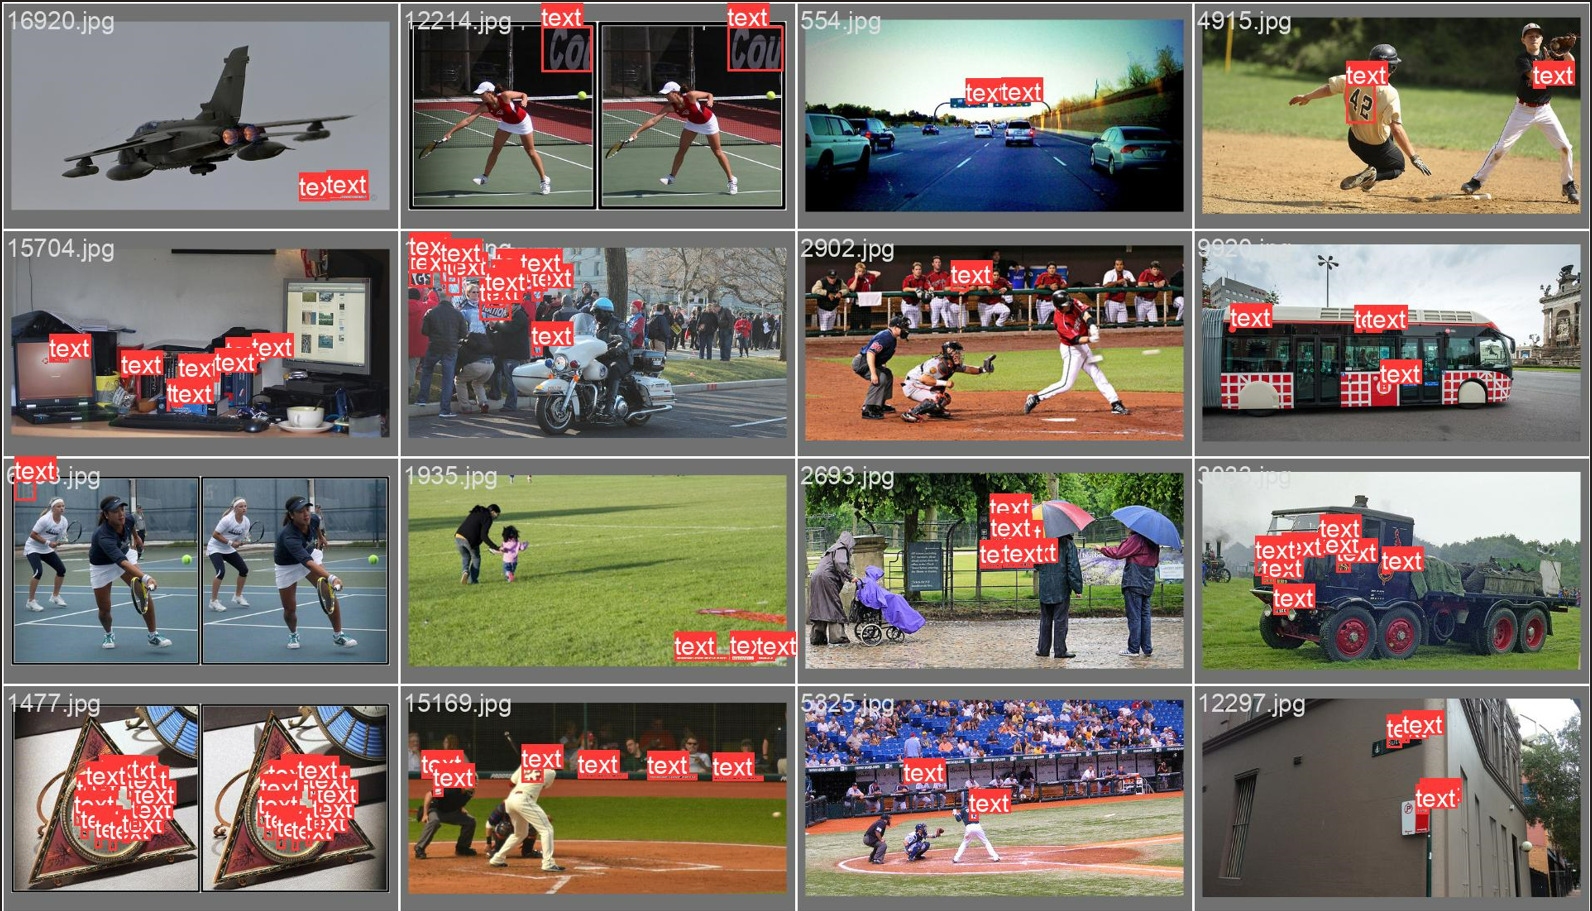

Prediction 1:

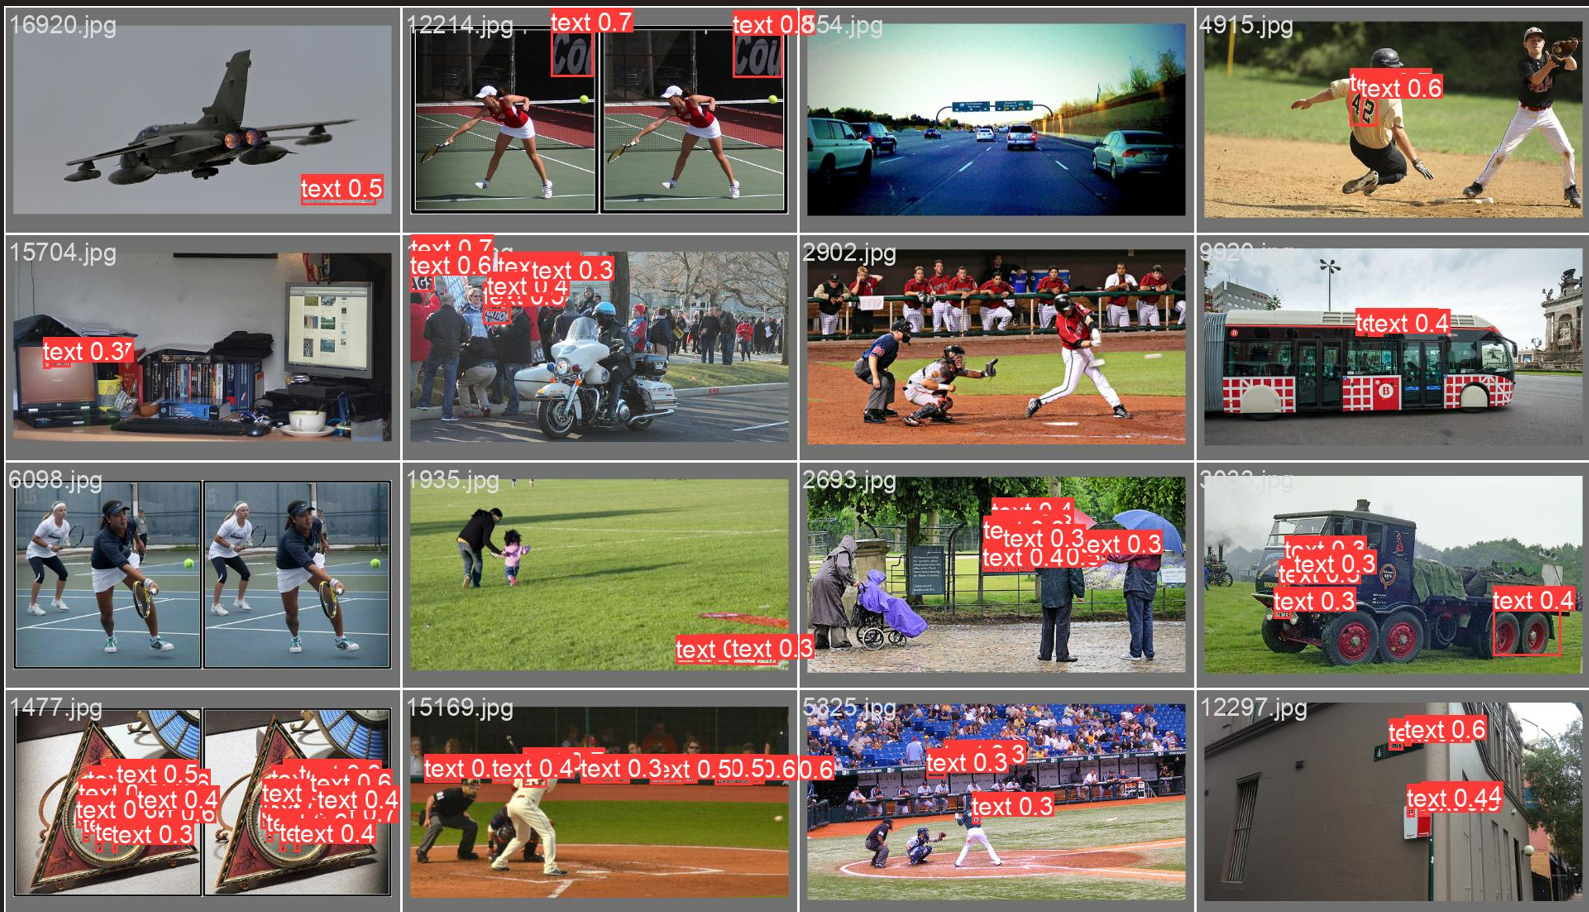

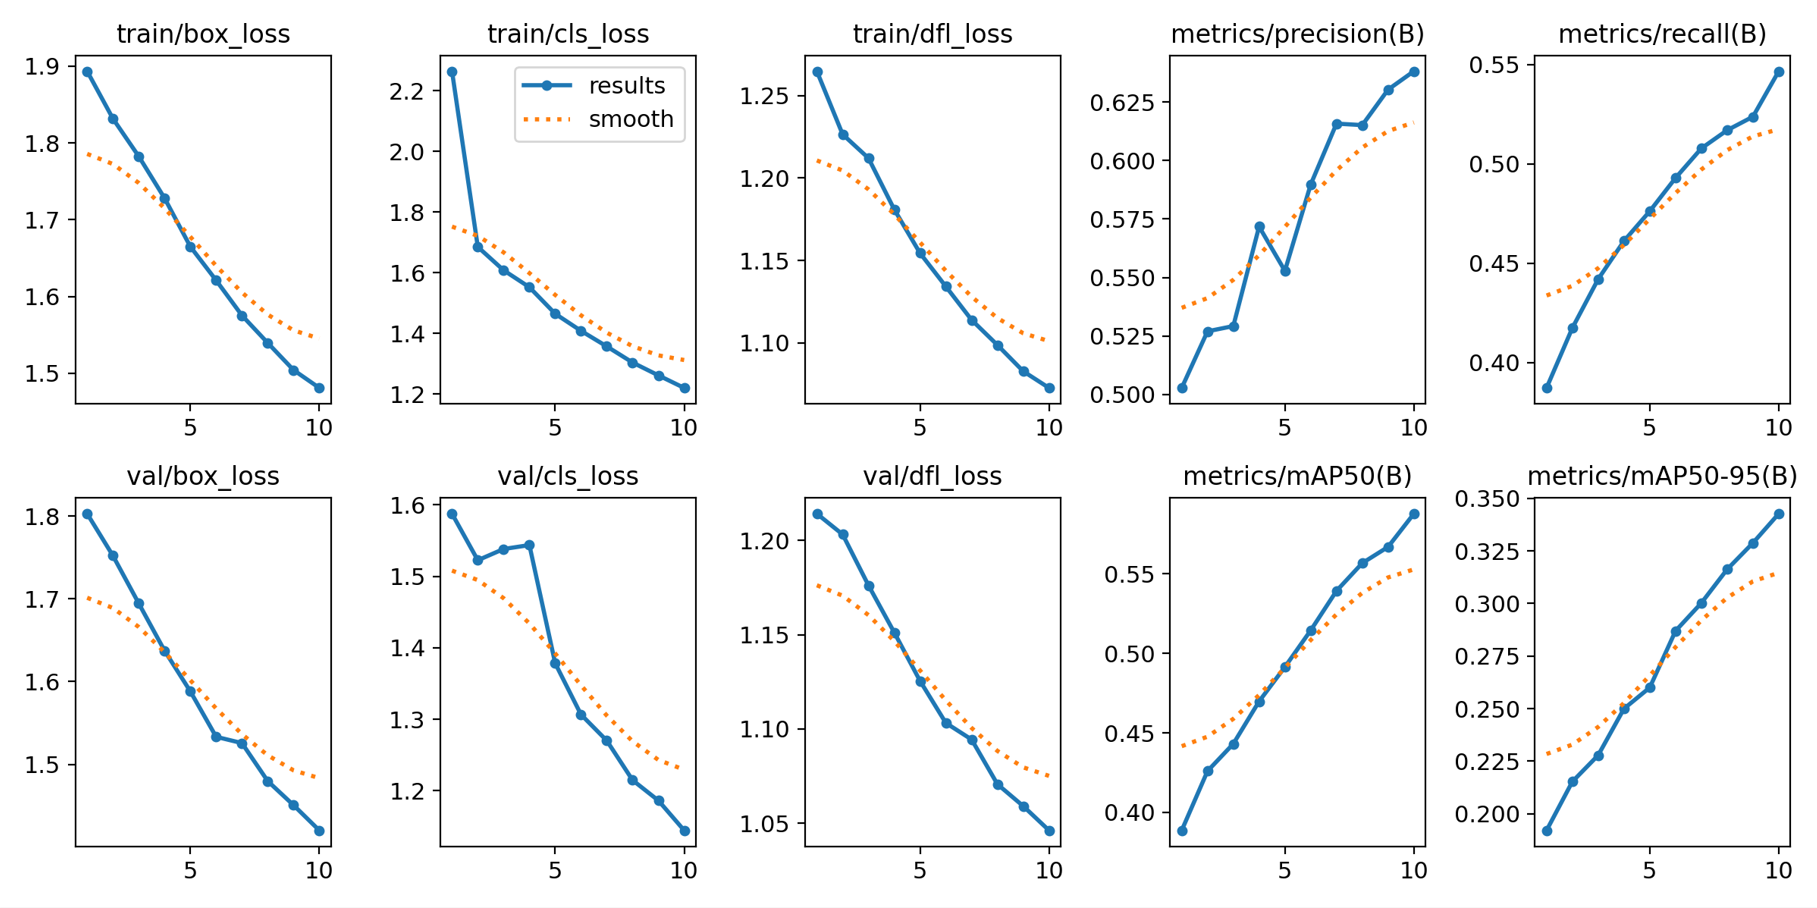

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"



In order to download the runs file from colab, we musst first zip the folder so that it is downloadable from colab.

In [ ]:
!zip -r /content/ultralytics.zip /content/ultralytics/

  adding: content/ultralytics/runs/ (stored 0%)
  adding: content/ultralytics/runs/detect/ (stored 0%)
  adding: content/ultralytics/runs/detect/predict4/ (stored 0%)
  adding: content/ultralytics/runs/detect/predict4/10974.jpg (deflated 0%)
  adding: content/ultralytics/runs/detect/train/ (stored 0%)
  adding: content/ultralytics/runs/detect/train/events.out.tfevents.1717950455.408eaff5db36.172.0 (deflated 92%)
  adding: content/ultralytics/runs/detect/train/train_batch1.jpg (deflated 11%)
  adding: content/ultralytics/runs/detect/train/val_batch1_labels.jpg (deflated 8%)
  adding: content/ultralytics/runs/detect/train/R_curve.png (deflated 19%)
  adding: content/ultralytics/runs/detect/train/P_curve.png (deflated 17%)
  adding: content/ultralytics/runs/detect/train/F1_curve.png (deflated 20%)
  adding: content/ultralytics/runs/detect/train/confusion_matrix.png (deflated 38%)
  adding: content/ultralytics/runs/detect/train/val_batch0_labels.jpg (deflated 10%)
  adding: content/ultraly

**Thank you**

---

